In [1]:
%matplotlib inline

import praw
import pandas as pd
import itertools
import yfinance as yf
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly_express as px

from IPython.display import display, Markdown, HTML
import numpy as np
from matplotlib.dates import date2num , DateFormatter

from statsmodels.tsa.stattools import grangercausalitytests


from sklearn.naive_bayes import GaussianNB
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

import os

In [2]:
df2 = pd.read_csv('Data/temp_datalab_records_linkedin_company.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df2.head()

dataset_id  as_of_date            company_name  followers_count  \
0       58329  2015-09-14           Goldman Sachs           552254   
1       58329  2015-09-15           Goldman Sachs           552862   
2       58363  2015-09-16     United Technologies            59157   
3       58366  2015-09-16            Novo Nordisk           336175   
4       58371  2015-09-16  Lowe's Companies, Inc.           134255   

   employees_on_platform                                   link  \
0                  38124  https://www.linkedin.com/company/1382   
1                  38141  https://www.linkedin.com/company/1382   
2                  14982  https://www.linkedin.com/company/2426   
3                  26448  https://www.linkedin.com/company/2227   
4                  62574  https://www.linkedin.com/company/4128   

               industry              date_added            date_updated  \
0    Investment Banking  2015-09-14 00:00:00+00  2015-09-14 00:00:00+00   
1    Investment Banking  2015-09-15 00:00:00+00  2015-09-15 00:00:00+00   
2  Aviation & Aerospace  2015-09-16 00:00:00+00  2015-09-16 00:00:00+00   
3       Pharmaceuticals  2015-09-16 00:00:00+00  2015-09-16 00:00:00+00   
4                Retail  2015-09-16 00:00:00+00  2015-09-16 00:00:00+00   

  description website  entity_id  cusip  isin  
0         NaN     NaN        NaN    NaN   NaN  
1         NaN     NaN        NaN    NaN   NaN  
2         NaN     NaN        NaN    NaN   NaN  
3         NaN     NaN        NaN    NaN   NaN  
4         NaN     NaN        NaN    NaN   NaN

In [4]:
df2['date_added'] = pd.to_datetime(df2['date_added'])

In [5]:
len(df2['company_name'][df2['employees_on_platform']==0].unique())

102

In [6]:
# We drop companies that have 0 employees at any point in time

df2.drop(df2[df2['employees_on_platform']==0].index, inplace=True)

In [7]:
df2

dataset_id  as_of_date  \
0             58329  2015-09-14   
1             58329  2015-09-15   
2             58363  2015-09-16   
3             58366  2015-09-16   
4             58371  2015-09-16   
...             ...         ...   
2426191      902985  2018-07-17   
2426192      903052  2018-07-17   
2426193      902948  2018-07-17   
2426194      910210  2018-07-17   
2426195      897002  2018-07-17   

                                              company_name  followers_count  \
0                                            Goldman Sachs           552254   
1                                            Goldman Sachs           552862   
2                                      United Technologies            59157   
3                                             Novo Nordisk           336175   
4                                   Lowe's Companies, Inc.           134255   
...                                                    ...              ...   
2426191  Diversified Restaurant Holdings, Inc (Nasdaq: ...              488   
2426192                     First Financial Northwest Bank              785   
2426193                                    DMC Global Inc.             1521   
2426194                                      ServiceSource            27963   
2426195                                           Attunity             4702   

         employees_on_platform                                     link  \
0                        38124    https://www.linkedin.com/company/1382   
1                        38141    https://www.linkedin.com/company/1382   
2                        14982    https://www.linkedin.com/company/2426   
3                        26448    https://www.linkedin.com/company/2227   
4                        62574    https://www.linkedin.com/company/4128   
...                        ...                                      ...   
2426191                     89  https://www.linkedin.com/company/428083   
2426192                    118  https://www.linkedin.com/company/497673   
2426193                    184  https://www.linkedin.com/company/586890   
2426194                   2496   https://www.linkedin.com/company/11889   
2426195                    635   https://www.linkedin.com/company/12886   

                                    industry                       date_added  \
0                         Investment Banking        2015-09-14 00:00:00+00:00   
1                         Investment Banking        2015-09-15 00:00:00+00:00   
2                       Aviation & Aerospace        2015-09-16 00:00:00+00:00   
3                            Pharmaceuticals        2015-09-16 00:00:00+00:00   
4                                     Retail        2015-09-16 00:00:00+00:00   
...                                      ...                              ...   
2426191                          Restaurants 2018-07-17 17:17:08.889700+00:00   
2426192                              Banking 2018-07-17 15:54:35.807059+00:00   
2426193                         Oil & Energy 2018-07-17 13:44:19.302482+00:00   
2426194  Information Technology and Services 2018-07-17 17:28:48.430667+00:00   
2426195  Information Technology and Services 2018-07-17 13:35:56.531514+00:00   

                          date_updated description  \
0               2015-09-14 00:00:00+00         NaN   
1               2015-09-15 00:00:00+00         NaN   
2               2015-09-16 00:00:00+00         NaN   
3               2015-09-16 00:00:00+00         NaN   
4               2015-09-16 00:00:00+00         NaN   
...                                ...         ...   
2426191  2018-07-17 17:17:08.889725+00         NaN   
2426192  2018-07-17 15:54:35.807085+00         NaN   
2426193  2018-07-17 13:44:19.302508+00         NaN   
2426194  2018-07-17 17:28:48.430717+00         NaN   
2426195  2018-07-17 13:35:56.531541+00         NaN   

                                              website  entity_id  cusip  isin  
0                                   

In [8]:
# We look at the number of employees at the earliest time and at the latest

df_latest = df2.loc[df2.groupby('dataset_id').date_added.idxmax()]
df_earliest = df2.loc[df2.groupby('dataset_id').date_added.idxmin()]

In [9]:
df_latest = df_latest.merge(df_earliest[['dataset_id', 'employees_on_platform']], suffixes=['_latest', '_earliest'], on='dataset_id')

In [10]:
df_latest['employees_ratio'] = df_latest['employees_on_platform_latest']/df_latest['employees_on_platform_earliest']

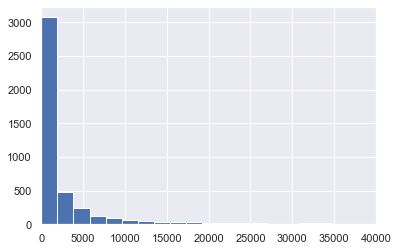

In [18]:
#Latest number of followers

#fig = go.Figure()
#fig.add_trace(go.Histogram(x=df_latest['employees_on_platform_latest'], nbinsx=100))

#fig.show()
plt.hist(df_latest['employees_on_platform_latest'], bins=300)
plt.xlim(0,40000);

In [770]:
# Examine the bin between 0 and 10k employees

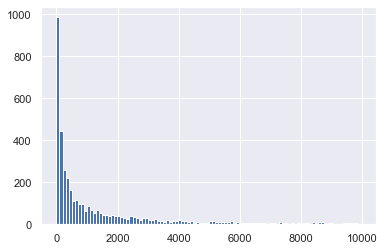

In [25]:
plt.hist(df_latest['employees_on_platform_latest'][df_latest['employees_on_platform_latest']<10000], bins=100);
#plt.xlim(0,10000);

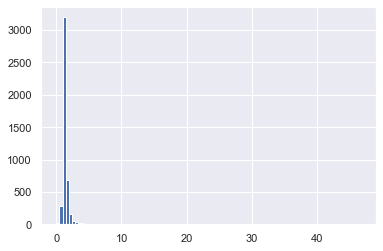

In [27]:
#fig = go.Figure()
#fig.add_trace(go.Histogram(x=df_latest['employees_ratio'], nbinsx=100))

#fig.show()

plt.hist(df_latest['employees_ratio'], bins=100);

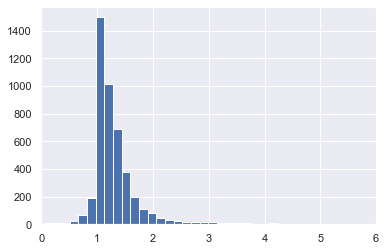

In [30]:
plt.hist(df_latest['employees_ratio'], bins=300)
plt.xlim(0,6);

In [31]:
df_latest['industry'][pd.isnull(df_latest['industry'])] = ''

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
industries = df_latest['industry'].unique()
for industry in industries:
    aux = df_latest['employees_ratio'][df_latest['industry']==industry]
    if len(aux)>100:
        print(industry+": ", len(aux), " - ", np.mean(aux))

Financial Services:  260  -  1.4553410704428285
Computer Software:  166  -  1.2845172899907995
Pharmaceuticals:  175  -  1.3354863970280841
Electrical/Electronic Manufacturing:  107  -  1.7370270767652098
Biotechnology:  310  -  1.3904542562066455
Retail:  156  -  1.518242492903392
Information Technology and Services:  174  -  1.2260582985167168
Oil & Energy:  217  -  1.35780039751991
Telecommunications:  120  -  1.3635540561572
Medical Devices:  120  -  1.3021496007438347
Banking:  313  -  1.3175739777226663
Internet:  144  -  1.4801183825753725
Insurance:  104  -  1.3276159925352577
Semiconductors:  102  -  1.2437516707190175
Real Estate:  143  -  1.289229153637651


In [33]:
fig = go.Figure()
for industry in industries:
    aux = df_latest['employees_ratio'][df_latest['industry']==industry]
    if len(aux)>150:
        print(industry+": ", len(aux), " - ", np.mean(aux))
        fig.add_trace(go.Histogram(x=aux, histnorm='probability', name=industry))
fig.show()

Financial Services:  260  -  1.4553410704428285
Computer Software:  166  -  1.2845172899907995
Pharmaceuticals:  175  -  1.3354863970280841
Biotechnology:  310  -  1.3904542562066455
Retail:  156  -  1.518242492903392
Information Technology and Services:  174  -  1.2260582985167168
Oil & Energy:  217  -  1.35780039751991
Banking:  313  -  1.3175739777226663


In [776]:
# When zooming in it's interesting to see that areas such as IT and computer services have grown at a slower rate than banking or retail.

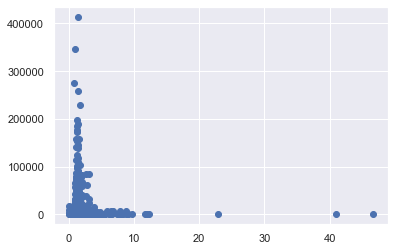

In [39]:
#fig = px.scatter(x=df_latest['employees_ratio'], 
#                 y=df_latest['employees_on_platform_earliest'],
#                hover_name=df_latest["company_name"], color=df_latest['industry'] , color_continuous_scale="Viridis")#)
#fig.update_layout(xaxis = go.layout.XAxis(title_text = "Employees Ratio"),
#                  yaxis = go.layout.YAxis(title_text = "Number of Employees (latest)"))
#fig.show()
# When checking with pyplot we can see the different categories
plt.scatter(x=df_latest['employees_ratio'], y=df_latest['employees_on_platform_earliest']);

In [40]:
# We are going to look at a few stocks. 
# We first find the 10 stocks with the highest number of employees according to their latest data

top10 = df_latest.sort_values(by='employees_on_platform_latest').tail(10)
df_ordered = df_latest.sort_values(by='employees_on_platform_latest')
df_ordered = df_ordered[df_ordered['employees_on_platform_latest']>100]

In [41]:
df_top10 = df2[df2['company_name'].isin(top10['company_name'])]

In [42]:
fig = px.area(x = df_top10['date_added'], 
              y = df_top10['employees_on_platform'], 
              facet_col=df_top10['company_name'], facet_col_wrap=2)
fig.show()

In [43]:
companies_top10 = top10['company_name'].unique()

In [44]:
companies_top10

array(['GE', 'Wells Fargo', 'Cognizant', 'Amazon', 'Bank of America',
       'JPMorgan Chase & Co.', 'Tata Consultancy Services', 'Accenture',
       'Walmart', 'IBM'], dtype=object)

In [45]:
fig = go.Figure()

for company in companies_top10:
    df_aux = df_top10.groupby('company_name').get_group(company)
    fig.add_traces(go.Scatter(x=df_aux["date_added"], y=df_aux["employees_on_platform"], name=company))
    #print(df_top10.groupby('company_name').get_group(company))
#fig.update_xaxes(
 #   dtick="M1",
  #  tickformat="%b\n%Y")
fig.show()

In [46]:
#Data to correlate tickers and the name of the company

df_stock = pd.read_csv('Data/companies.csv')

In [47]:
# Find ticker for company:
df_stock.head()

ticker                     company name                   short name  \
0      A        Agilent Technologies Inc.                      Agilent   
1     AA                Alcoa Corporation                        Alcoa   
2   AABA                      Altaba Inc.                       Altaba   
3    AAC                AAC Holdings Inc.                          AAC   
4   AADR  AdvisorShares Dorsey Wright ADR  AdvisorShares Dorsey Wright   

                         industry  \
0  Medical Diagnostics & Research   
1                 Metals & Mining   
2                Asset Management   
3           Health Care Providers   
4                             NaN   

                                         description  \
0  Agilent Technologies Inc is engaged in life sc...   
1  Alcoa Corp is an integrated aluminum company. ...   
2  Altaba Inc is an independent, non-diversified,...   
3  AAC Holdings Inc provides inpatient and outpat...   
4  The investment seeks long-term capital appreci...   

                                   website      logo                     ceo  \
0                   http://www.agilent.com     A.png     Michael R. McMullen   
1                     http://www.alcoa.com    AA.png  Roy Christopher Harvey   
2                    http://www.altaba.com  AABA.png     Thomas J. Mcinerney   
3  http://www.americanaddictioncenters.org       NaN   Michael T. Cartwright   
4             http://www.advisorshares.com  AADR.png                     NaN   

                  exchange    market cap              sector  \
0  New York Stock Exchange  2.421807e+10          Healthcare   
1  New York Stock Exchange  5.374967e+09     Basic Materials   
2     Nasdaq Global Select  4.122368e+10  Financial Services   
3  New York Stock Exchange  6.372010e+07          Healthcare   
4                NYSE Arca  1.031612e+08                 NaN   

                tag 1                   tag 2                           tag 3  
0          Healthcare  Diagnostics & Research  Medical Diagnostics & Research  
1     Basic Materials                Aluminum                 Metals & Mining  
2  Financial Services        Asset Management                             NaN  
3          Healthcare            Medical Care           Health Care Providers  
4                 NaN                     NaN                             NaN

In [48]:
df2['dataset_id'][df2['company_name']==companies_top10[1]].iloc[0]

58398

In [49]:
gs = yf.Ticker("gs")
df_gs = gs.history(period="6y")
df_gs['Date'] = df_gs.index
lkd_gs = df2[df2['dataset_id']==58329]

In [50]:
ge = yf.Ticker("GE")
df_ge = ge.history(period="6y")
df_ge['Date'] = df_ge.index
#df_ge = df_ge[df_ge['Date']<'31-07-2019']
lkd_ge = df2[df2['dataset_id']==58402]

In [51]:
wfc = yf.Ticker("wfc")
df_wfc = wfc.history(period="6y")
df_wfc['Date'] = df_wfc.index
#df_wfc = df_ge[df_ge['Date']<'31-07-2019']
lkd_wfc = df2[df2['dataset_id']==58398]

In [52]:
def plot_sotck_employees(stock_df, lkd_df):

    trace1 = (go.Scatter(x=stock_df['Date'], y=stock_df["Open"], name='Open',
                        yaxis='y1'))
    trace2 = (go.Scatter(x=stock_df['Date'], y=stock_df["Close"], name="Close",
                        yaxis='y1'))
    trace3 = (go.Scatter(x=lkd_df['as_of_date'], y=lkd_df['employees_on_platform'],
                        yaxis='y2', name="Employees"))
    data = [trace1, trace2, trace3]
    layout = go.Layout(title= lkd_df['company_name'].iloc[0],
                       yaxis=dict(title='Share value'),
                       yaxis2=dict(title='Number of Employees',
                                   overlaying='y',
                                   side='right'))

    fig = go.Figure()
        
    return go.Figure(data=data, layout=layout)
    

In [53]:
plot_sotck_employees(df_gs, lkd_gs)

In [54]:
plot_sotck_employees(df_ge, lkd_ge)

In [55]:
plot_sotck_employees(df_wfc, lkd_wfc)

In [57]:
df_stock = df_stock.drop_duplicates(subset=['short name'])
df_stock = df_stock.drop_duplicates(subset=['company name'])

In [58]:
df2 = df2.merge(df_stock[['short name', 'ticker']], left_on='company_name', right_on='short name', how='left')
df2 = df2.merge(df_stock[['company name', 'ticker']], left_on='company_name', right_on='company name', how='left')

In [59]:
gs = yf.Ticker("gs")
df_gs = gs.history(period="6y")
df_gs['Date'] = df_gs.index
df_gs = df_gs[df_gs['Date']<'31-07-2019']
lkd_gs = df2[df2['dataset_id']==58329]

In [60]:
def plot_sotck_employees_lt(stock_df, lkd_df):

    trace1 = (go.Scatter(x=stock_df['Date'], y=stock_df["Open"], name='Open',
                        yaxis='y1'))
    trace2 = (go.Scatter(x=stock_df['Date'], y=stock_df["Close"], name="Close",
                        yaxis='y1'))
    trace3 = (go.Scatter(x=lkd_df['as_of_date'], y=lkd_df['long term'],
                        yaxis='y2', name="Employees"))
    trace4 = (go.Scatter(x=lkd_df['as_of_date'], y=lkd_df['short term'],
                        yaxis='y2', name="Employees"))
    data = [trace1, trace2, trace3, trace4]
    layout = go.Layout(title= lkd_df['company_name'].iloc[0],
                       yaxis=dict(title='Share value'),
                       yaxis2=dict(title='Number of Employees',
                                   overlaying='y',
                                   side='right'))
    return go.Figure(data=data, layout=layout)

In [61]:
df_gs.drop('Date',axis=1, inplace=True)

In [62]:
lkd_gs['as_of_date'] = pd.to_datetime(lkd_gs['as_of_date'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
df_gs

Open        High         Low       Close   Volume  \
Date                                                                  
2014-10-09  168.694666  169.012401  164.091915  164.563995  4892900   
2014-10-10  164.836297  166.089105  163.465451  163.755966  4405600   
2014-10-13  164.318850  166.307019  162.049252  162.294373  3436500   
2014-10-14  162.938918  165.036023  161.386521  162.230804  3557200   
2014-10-15  160.224471  161.549908  155.712511  160.905350  6330500   
...                ...         ...         ...         ...      ...   
2019-07-24  212.718664  215.474058  212.117138  215.415848  3180000   
2019-07-25  215.163596  215.163596  211.729042  213.426910  2776700   
2019-07-26  213.882910  215.619595  213.805291  215.522568  2304500   
2019-07-29  214.416526  215.512869  213.640355  213.756790  1372800   
2019-07-30  211.981295  215.377031  210.855847  214.804596  1644600   

            Dividends  Stock Splits  
Date                                 
2014-10-09        0.0             0  
2014-10-10        0.0             0  
2014-10-13        0.0             0  
2014-10-14        0.0             0  
2014-10-15        0.0             0  
...               ...           ...  
2019-07-24        0.0             0  
2019-07-25        0.0             0  
2019-07-26        0.0             0  
2019-07-29        0.0             0  
2019-07-30        0.0             0  

[1209 rows x 7 columns]

In [64]:
df_gs = df_gs.reset_index().merge(lkd_gs[['as_of_date', 'employees_on_platform']], right_on='as_of_date', left_on='Date', how='left',
           left_index=True).set_index('Date')

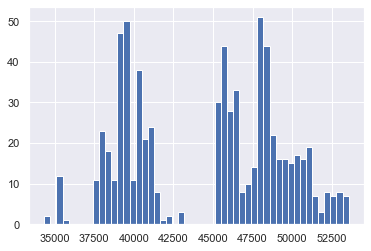

In [65]:
df_gs['employees_on_platform'].hist(bins=50)

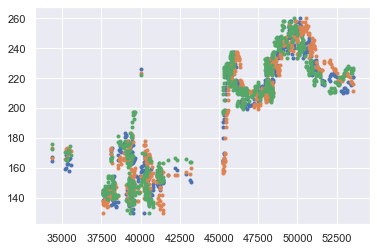

In [68]:
plt.scatter(df_gs['employees_on_platform'], df_gs['Close'], marker='.', label='same-day data')
plt.scatter(df_gs['employees_on_platform'][15:], df_gs['Close'][:-15], marker='.', label='same-day data')
plt.scatter(df_gs['employees_on_platform'][:-15], df_gs['Close'][15:], marker='.', label='same-day data')

In [751]:
# The number of employees tend to vary too much. We will just use companies where this variation is smaller.

In [69]:
# I am only interested in companies that have a ticker.

df_ticker = df2[np.logical_or(pd.isnull(df2['ticker_x'])==False,
                             pd.isnull(df2['ticker_y'])==False)].reset_index()

In [70]:
df_ticker['ticker'] = df_ticker['ticker_x'].combine_first(df_ticker['ticker_y'])

In [71]:
comp_ticker = df_ticker['ticker'].unique()

In [72]:
save_tick = []
sd = []

for tick in comp_ticker:
#for tick in range(7):
    df_aux = df_ticker[df_ticker['ticker']==tick]
    df_aux['diff'] = df_aux['employees_on_platform'] - df_aux['employees_on_platform'].shift(7)
    sd.append(np.std(df_aux['diff']))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df_sd = pd.DataFrame({'STDDEV': sd, 'Tick': comp_ticker})

In [74]:
# Only choose companies where the standard deviation is smaller than 300
df_sd = df_sd[np.logical_and(df_sd['STDDEV']>.5, 
                    df_sd['STDDEV']<300)].reset_index()

In [75]:

tick_anlys = df_sd['Tick']

In [77]:
df_sd

index      STDDEV  Tick
0        10  242.409328     V
1        12  150.463267  BIIB
2        18  296.386399   BLK
3        19  158.724347  GILD
4        20  102.834563  CELG
...     ...         ...   ...
1198   1431    1.142443  BDSI
1199   1432   17.751507  SAFM
1200   1433    0.670621  WKHS
1201   1434    2.011863   ABR
1202   1435   12.929013   SRI

[1203 rows x 3 columns]

In [78]:
df_aux = df_ticker[df_ticker['ticker']=='BLK']

In [79]:
#plt.scatter(df_aux['as_of_date'], df_aux['diff'].ewm(alpha=1).mean())

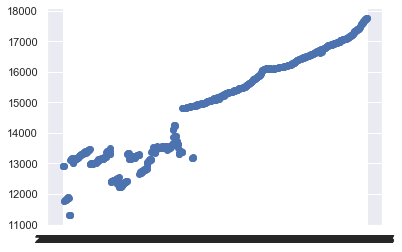

In [80]:
# Check how the highest std one looks like
plt.scatter(df_aux['as_of_date'], df_aux['employees_on_platform'])

In [81]:
def corr_stock_emp(df_ori, c_tick):
    '''
    Returns a dataframe with moving averages for 1 month and 1 week
    '''
    stock = yf.Ticker(c_tick)
    df_stock = stock.history(period="6y")
    df_stock['Date'] = df_stock.index
    lkd = df_ori[df_ori['ticker']==c_tick]

    df_stock.drop('Date',axis=1, inplace=True)

    lkd['as_of_date'] = pd.to_datetime(lkd['as_of_date'])

    df_stock = df_stock.reset_index().merge(lkd[['as_of_date', 'employees_on_platform']], 
                                            right_on='as_of_date', left_on='Date', how='left',
                                            left_index=True).set_index('Date')
    df_stock['MAV Open long term'] = df_stock['Open'].rolling(window=30).mean()
    df_stock['MAV Open short term'] = df_stock['Open'].rolling(window=7).mean()
    df_stock['MAV Employees long term'] = df_stock['employees_on_platform'].rolling(window=30).mean()
    df_stock['MAV Employees short term'] = df_stock['employees_on_platform'].rolling(window=7).mean()

    df_stock['Diff Open'] = df_stock['MAV Open long term'] - df_stock['MAV Open short term']
    df_stock['Diff Employees'] = df_stock['MAV Employees long term'] - df_stock['MAV Employees short term']
    
    return df_stock
    


In [82]:
df_stock = corr_stock_emp(df_ticker, tick_anlys[0])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Time Series 1')

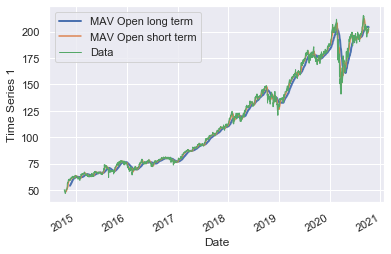

In [83]:
df_stock['MAV Open long term'].plot(grid=True,lw=2)
df_stock['MAV Open short term'].plot(grid=True)
df_stock['Open'].plot(grid=True,lw=1,label='Data')
plt.legend()
plt.ylabel('Time Series 1')

Text(0, 0.5, 'Time Series 1')

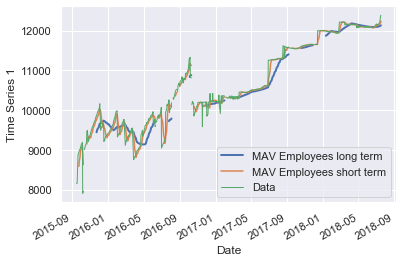

In [84]:
df_stock['MAV Employees long term'].plot(grid=True,lw=2)
df_stock['MAV Employees short term'].plot(grid=True)
df_stock['employees_on_platform'].plot(grid=True,lw=1,label='Data')
plt.legend()
plt.ylabel('Time Series 1')

(-5, 5)

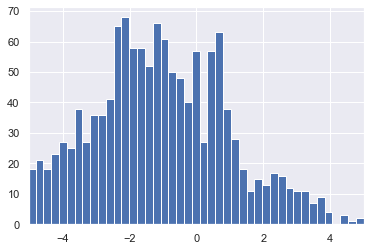

In [85]:
df_stock['Diff Open'].hist(bins=200)
plt.xlim(-5,5)

(0, 50)

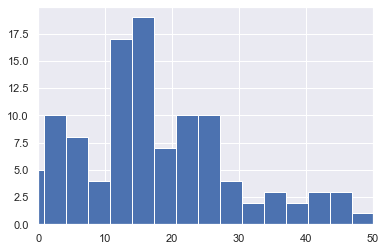

In [86]:
df_stock['Diff Employees'].hist(bins=300)
plt.xlim(0,50)

In [87]:
x = 0.2

df_stock['Performance Open 1'] = np.where(df_stock['Diff Open'] > x, 1, 0)
df_stock['Performance Open 1'] = np.where(df_stock['Diff Open'] < x, -1, df_stock['Performance Open 1'])

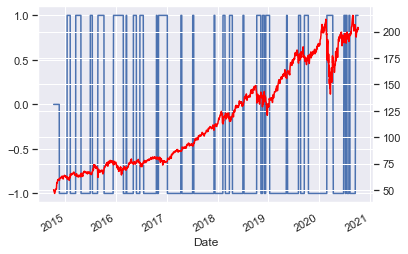

In [88]:
fig, ax = plt.subplots()
ax3 = ax.twinx()

ax1 = df_stock['Performance Open 1'].plot(ax=ax, color='b')
ax2 = df_stock['Open'].plot(ax=ax3, color='red')

In [89]:
x = 10.

df_stock['Performance Employees 1'] = np.where(df_stock['Diff Employees'] > x, 1, 0)
df_stock['Performance Employees 1'] = np.where(df_stock['Diff Employees'] < x, -1, df_stock['Performance Employees 1'])

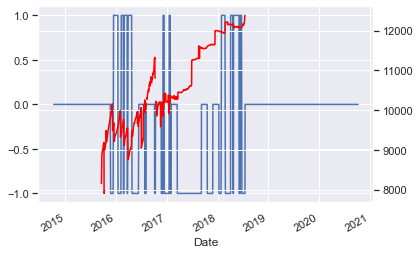

In [90]:
fig, ax = plt.subplots()
ax3 = ax.twinx()

ax1 = df_stock['Performance Employees 1'].plot(ax=ax, color='b')
ax2 = df_stock['employees_on_platform'].plot(ax=ax3, color='red')

In [91]:
df_stock['R_t1'] = np.log(df_stock['Open'] / df_stock['Open'].shift(1))
df_stock['Model Open'] = df_stock['R_t1'] * df_stock['Performance Open 1'].shift(1)
df_stock['R_t2'] = np.log(df_stock['employees_on_platform'] / df_stock['employees_on_platform'].shift(1))
df_stock['Model Employees'] = df_stock['R_t2'] * df_stock['Performance Employees 1'].shift(1)

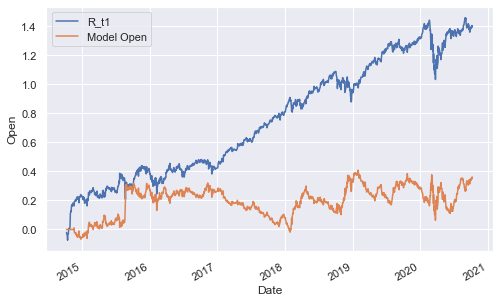

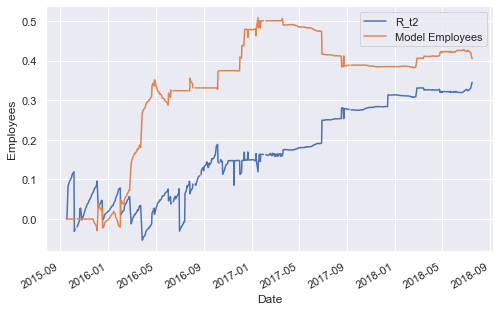

In [92]:
plot1 = df_stock[['R_t1','Model Open']].cumsum().plot(grid=True,figsize=(8,5))

plt.ylabel('Open')
plt.xlabel('Date')
plot2 = df_stock[['R_t2','Model Employees']].cumsum().plot(grid=True,figsize=(8,5))
plt.ylabel('Employees')
plt.xlabel('Date');

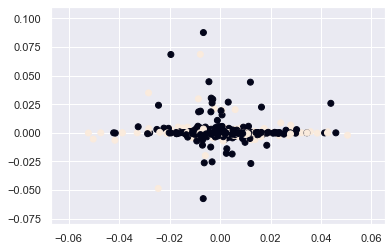

In [94]:
plt.scatter(df_stock['Model Open'], df_stock['Model Employees'], c=df_stock['Performance Open 1'])

In [95]:
df_new = df_stock[['Performance Open 1', 'Performance Employees 1', 'R_t1', 'R_t2', 'Model Employees', 'Model Open']]

In [96]:
df_new = df_new.dropna()

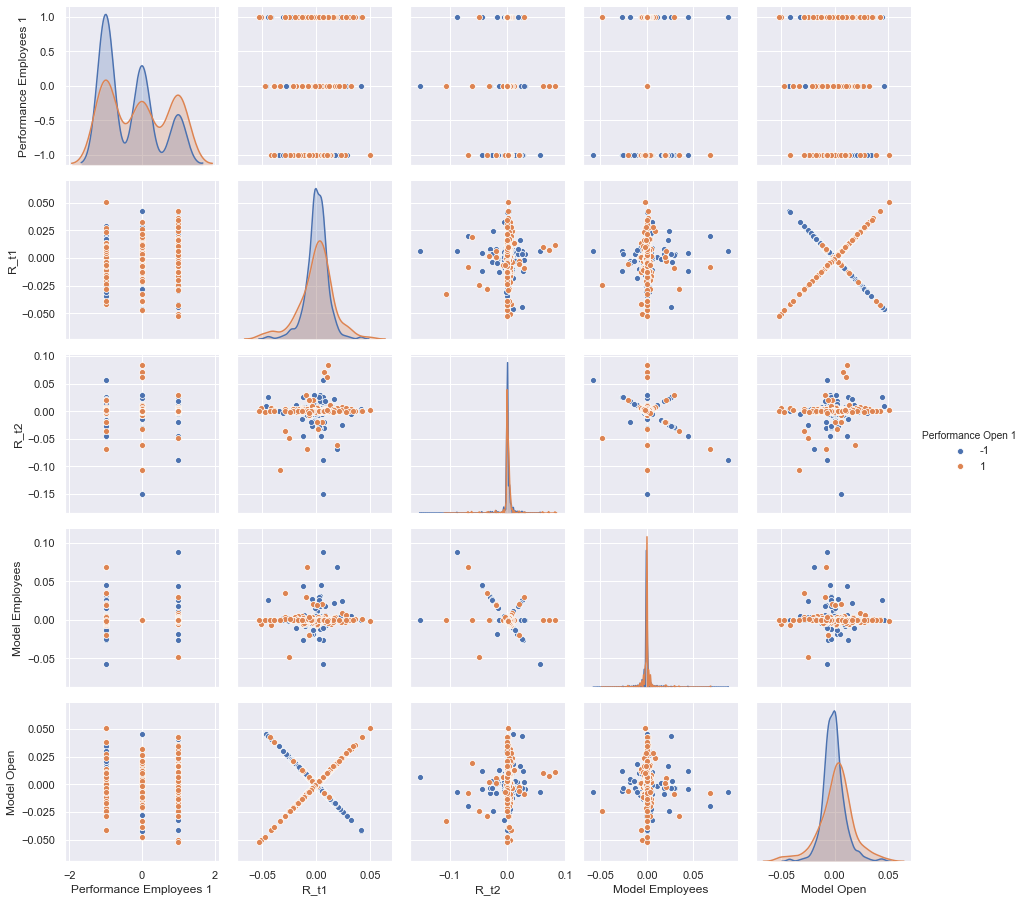

In [97]:
sns.pairplot(df_new, hue='Performance Open 1')

In [98]:
df_new['Performance Open 1'].unique()

array([ 1, -1])

In [99]:
X = df_new.drop('Performance Open 1', axis=1)

y = df_new['Performance Open 1']

In [100]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=False)

In [101]:
Xtest

Performance Employees 1      R_t1      R_t2  Model Employees  \
Date                                                                       
2017-12-27                        0  0.005517  0.000250         0.000000   
2017-12-28                        0  0.014186  0.000167         0.000000   
2017-12-29                        0  0.003929  0.000083         0.000000   
2018-01-02                        0 -0.001570 -0.000333        -0.000000   
2018-01-03                        0  0.003311 -0.000083        -0.000000   
...                             ...       ...       ...              ...   
2018-07-11                       -1  0.007788  0.001560        -0.001560   
2018-07-12                       -1  0.017269  0.000410        -0.000410   
2018-07-13                       -1  0.005595  0.000984        -0.000984   
2018-07-16                       -1 -0.002650  0.013911        -0.013911   
2018-07-17                       -1 -0.008934  0.000646        -0.000646   

            Model Open  
Date                    
2017-12-27   -0.005517  
2017-12-28   -0.014186  
2017-12-29   -0.003929  
2018-01-02    0.001570  
2018-01-03   -0.003311  
...                ...  
2018-07-11   -0.007788  
2018-07-12   -0.017269  
2018-07-13   -0.005595  
2018-07-16    0.002650  
2018-07-17    0.008934  

[139 rows x 5 columns]

In [1116]:
model = GaussianNB()
#model = svm.LinearSVC()

In [1117]:
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [1118]:
y_model = model.predict(Xtest)

In [1119]:
accuracy_score(ytest, y_model)

0.7266187050359713

In [1120]:
y_model

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])